# MACHINE LEARNING ASSIGNMENT - LEAF CLASSIFICATION



## SUBMITTED BY : 
### KHUSHI THAPAR (102018054)
### SHAGUN SHARMA (102018062)

## PREDICTING SPECIES OF LEAF

### IMPORTING LIBRARIES

In [79]:
import pandas as pd
import numpy as np

### LOADING DATA

In [80]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [81]:
x_train = train.drop(['id', 'species'], axis = 1)
x_test = test.drop(['id'], axis  = 1)

In [82]:
y_train = train['species']

### FINDING NULL VALUES IN THE DATA

In [83]:
train.isnull().any().sum()

0

### FINDING UNIQUE VALUES 

In [84]:
y_train.nunique()

99

### INDEXING SPECIES 

In [85]:
species = {idx:value for idx , value in enumerate(y_train.unique())}

### SPLITTING INTO TRAINING AND TESTING 

In [99]:
from sklearn.model_selection import  train_test_split

In [100]:
train_t, train_test, y_t, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state =1)

### REPLACING SPECIES NAMES WITH VALUES

In [101]:
 train_species = y_t.replace(to_replace=species.values(),value=species)

In [102]:
train_species

812    21
47     40
516    73
851    80
19     19
       ..
767    55
72     53
908    28
235    81
37     33
Name: species, Length: 792, dtype: int64

In [103]:
test_species = y_test.replace(to_replace=species.values(),value=species)

In [91]:
test_species

320    96
834    43
946    72
702     0
941    24
       ..
783    26
207    54
757    71
341    78
241    24
Name: species, Length: 198, dtype: int64

## MODEL FITTING
### DECISION TREE CLASSIFICATION 

In [104]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

In [105]:
clf = DecisionTreeClassifier()

In [106]:
clf = clf.fit(train_t, train_species)

In [107]:
testdata2 = clf.predict(train_test)

In [108]:
testdata2


array([96, 43, 72,  0, 81, 97, 48, 18, 54, 74, 81,  4, 85, 73, 48,  1,  9,
       56, 68, 51, 62,  1, 97, 32, 58, 53, 53, 46, 13, 51, 89, 76, 97, 16,
        2, 97, 79, 32, 70, 67, 71, 71,  2, 10, 15, 51, 30,  0, 31, 23, 69,
       87, 94, 59, 51, 62, 28, 82, 22, 51, 95, 57, 73, 63, 70, 17,  8, 42,
       41,  9, 32, 50,  8, 66, 32, 59,  0,  6,  2,  5, 50, 23, 30, 10, 20,
       82, 44, 61, 34, 69,  2, 31, 86, 27,  8, 81, 35, 93, 92,  8, 93,  3,
       93,  8,  7, 41, 26, 37,  5, 73, 90, 29, 27, 94,  1, 83, 31, 24, 94,
       92, 11, 92, 73, 75, 96, 35,  7, 46, 37,  8,  4,  2, 48, 71, 34, 51,
       27, 41, 35, 27, 92, 90, 70, 12, 94, 22, 40, 26, 68, 25,  8, 73, 78,
       30, 34, 40, 58, 20, 72, 75, 83, 20, 64, 86, 78, 10, 31, 68, 39, 65,
       98,  9, 95,  6, 33, 38, 60, 10,  3, 59, 82, 63, 89,  2, 71, 10, 17,
       29, 11, 51,  5, 89, 43, 26, 54, 71, 78, 24], dtype=int64)

In [109]:
y_testval = pd.DataFrame(testdata2, columns = ['Species'])
y_testval

,Species
0,96
1,43
2,72
3,0
4,81
...,...
193,26
194,54
195,71
196,78


In [47]:
test_species

320    96
834    43
946    72
702     0
941    24
       ..
783    26
207    54
757    71
341    78
241    24
Name: species, Length: 198, dtype: int64

### ACCURACY

In [110]:
print("Accuracy:",metrics.accuracy_score(test_species, y_testval))

Accuracy: 0.5858585858585859


### PREDICTING SPECIES OF TEST DATA 

In [112]:
res = clf.predict(x_test)

In [113]:
res

array([56, 93, 62, 93, 58,  0,  0, 37,  4, 58, 37, 12, 44, 68, 40, 92, 78,
       25, 21, 54, 82, 97, 65, 92, 21, 95, 31, 23, 52, 95,  8, 12, 43, 97,
       52, 27, 86,  2,  5, 58, 58, 51, 58, 41, 54, 95, 77, 37, 94,  1, 40,
       57, 76,  3, 74, 45, 46, 96, 56, 76, 29, 64, 32, 89,  8, 55, 42,  4,
       21, 17, 34, 77, 66, 87, 15, 10, 48,  4, 33, 68, 66, 16, 85, 83, 62,
       71, 73, 74,  5, 26, 36, 96, 33, 32, 27, 74, 84, 27, 79,  9, 62, 22,
        0, 30, 76,  4, 97, 83, 44, 53, 67, 90, 80, 81, 58, 64, 35, 75, 43,
       65, 47, 88, 35, 30, 18, 28,  7, 15, 77, 81, 83, 72, 84, 82, 73, 60,
       66, 31, 97, 47, 88,  7, 97, 61, 35, 40, 27, 15, 88, 47, 14, 67, 89,
       52, 90, 62, 68, 77, 16, 18,  8, 35, 69, 46, 30, 49, 36, 75, 51, 60,
       18, 32, 66, 32, 58, 68, 14, 13, 28, 26, 23,  0, 94, 34, 16, 57, 73,
        0,  5,  1,  9, 53, 72, 55, 45,  0, 39, 98, 66, 18, 91, 87,  7, 78,
       26, 41,  7, 96, 19,  9, 25, 24, 72, 89, 70, 83, 95, 51, 66,  7, 98,
       34, 19, 77, 57, 35

In [114]:
result = pd.DataFrame(res, columns = ['Species'])

### FROM SPECIES NUMBERING TO SPECIES NAME

In [115]:
ans = result.replace(to_replace=species.keys(),value=species.values())

In [116]:
ans

,Species
0,Quercus_Agrifolia
1,Castanea_Sativa
2,Acer_Circinatum
3,Castanea_Sativa
4,Acer_Rufinerve
...,...
589,Acer_Circinatum
590,Acer_Circinatum
591,Quercus_Variabilis
592,Quercus_x_Hispanica


### RANDOM FOREST 

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(train_t, train_species)

RandomForestClassifier(n_estimators=50)

In [118]:
pred_s = classifier.predict(train_test)
pred_s

array([96, 43, 72,  0, 24, 45, 67, 18, 54, 74, 81,  6, 85, 73, 67,  1,  9,
       69, 68, 51, 34, 39, 25, 32, 55, 89, 53, 46, 13, 57, 63, 76, 76, 16,
       76, 25, 88,  6, 70, 67, 72,  5,  2, 42, 15, 51, 30,  0, 31, 23, 20,
       87, 94, 36, 57, 84, 28, 82, 84, 61, 95, 22, 73, 89, 70, 17,  8, 42,
       41,  9, 32, 50, 61, 37, 32, 59,  0, 34,  2, 83, 50, 23, 30, 10,  6,
       82, 44, 61, 17, 20, 30, 31, 86,  3,  6, 81, 46, 13, 74, 62, 93, 83,
       93, 61,  7, 41, 26, 49,  5, 34, 90, 29, 94, 94, 39, 27, 82, 24,  3,
       69, 11, 92, 34, 75, 96, 35,  7, 79, 37, 67, 61,  2, 48, 71, 34, 84,
        4, 41, 35, 27, 22, 90, 70, 12, 94, 74, 55, 26, 74, 55,  8, 70, 14,
       21, 68, 40, 58,  8, 88, 75, 31, 92, 64, 86, 78, 10, 82, 19, 39, 36,
       98,  9, 95,  6, 33, 38, 60, 42,  3, 59, 82, 63, 63,  2, 71, 21, 17,
       60, 11, 15,  5, 89, 43, 26, 89, 71, 78, 24], dtype=int64)

### ACCURACY

In [119]:
accuracy_score(test_species, pred_s)

0.9444444444444444

### PREDICTION OF TEST DATA 

In [120]:
pred = classifier.predict(x_test)

In [122]:
result2 = pd.DataFrame(pred, columns = ['Species'])
result2

,Species
0,56
1,13
2,62
3,93
4,86
...,...
589,62
590,30
591,6
592,25


In [123]:
res2 = result2.replace(to_replace=species.keys(),value=species.values())

In [124]:
res2

,Species
0,Quercus_Agrifolia
1,Quercus_Afares
2,Acer_Circinatum
3,Castanea_Sativa
4,Alnus_Viridis
...,...
589,Acer_Circinatum
590,Alnus_Rubra
591,Quercus_Canariensis
592,Quercus_Phillyraeoides


## IMAGE CLASSIFICATION



In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [14]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 25 files belonging to 3 classes.
Found 3 files belonging to 3 classes.


In [15]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 1.5784 - accuracy: 0.3600 - val_loss: 1.4044 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 9.9608 - accuracy: 0.4000 - val_loss: 1.2595 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: -39.5553 - accuracy: 0.5200 - val_loss: 1.5879 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: -68.7520 - accuracy: 0.6800 - val_loss: 1.7216 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: -113.6376 - accuracy: 0.6800 - val_loss: 0.9308 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: -161.0355 - accuracy: 0.6400 - val_loss: 0.7114 - val_accuracy: 0.3333
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: -213.8978 - accuracy: 0.7200 - val_loss: 3.3320 - val_accuracy: 0.6667
Epoch 8/

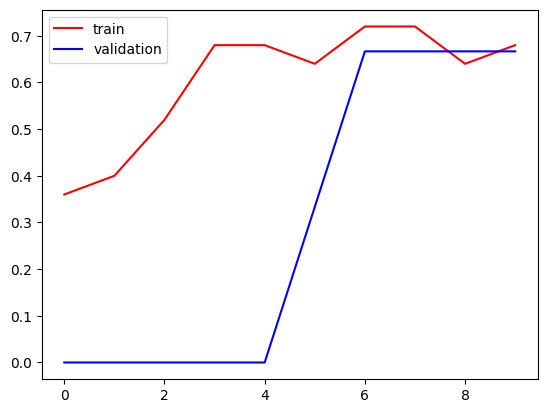

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

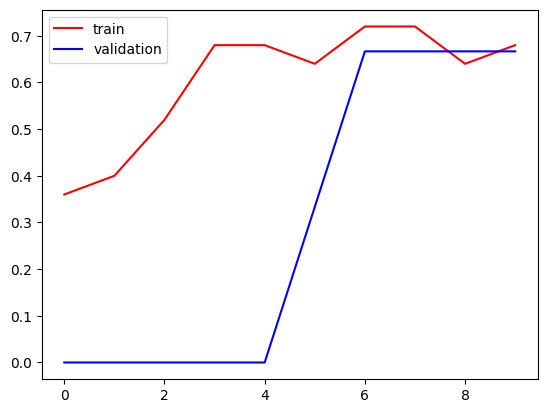

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

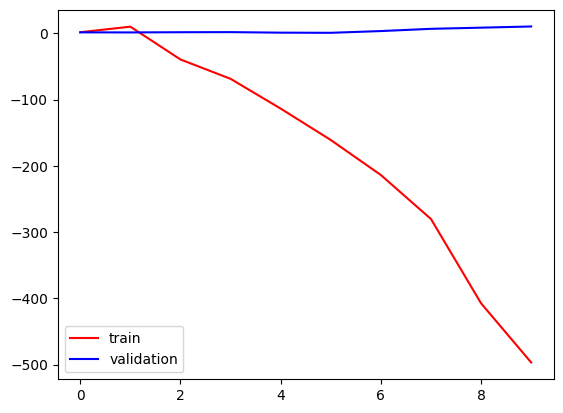

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

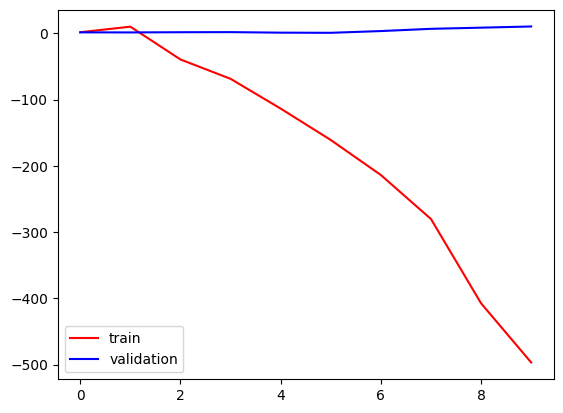

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import cv2

In [24]:
test_img = cv2.imread('/content/cat.jpg')

TypeError: Image data of dtype object cannot be converted to float

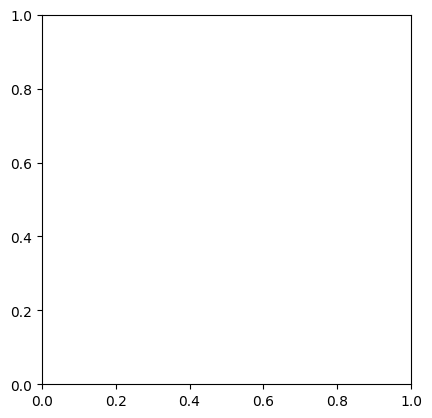

In [26]:
plt.imshow(test_img)

In [27]:
test_img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)